
# 🌼 자연어처리 기초 - 2차시(24.11.11)

---


## 1. 워드클라우드
- 주어진 텍스트 데이터에서 단어의 중요도나 빈도를 시각화하는 도구
- 텍스트에서 가장 많이 등장하는 단어일수록 큰 글자로 표시
- 단어의 크기는 단어가 나타난 빈도에 비례
- 주요 데이터를 한눈에 파악하기O

In [ ]:
# pip install wordcloud


In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
text = 'Python is a powerful programming language. Python is great for data analysis and visualization.'

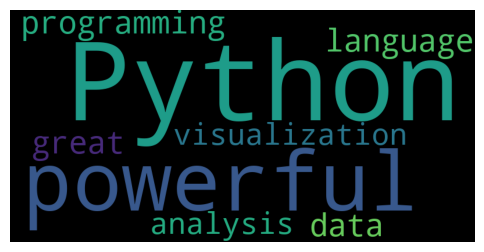

In [4]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 자연어 분류

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# 학습, 예측 데이터셋을 불러온다.
train = pd.read_csv('./data/open/train_data.csv')
test = pd.read_csv('./data/open/test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [7]:
topic = pd.read_csv('./data/open/topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [8]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [9]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [10]:
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [11]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [14]:
df = raw.merge(topic, how='left')  # raw에 있는 행을 모두 유지하고 토픽 데이터가 각각의 raw와 일치하는 경우에만 결합 없는 경우 NaN (left join)
df.shape

(54785, 4)

In [15]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [16]:
df.tail()

,index,title,topic_idx,topic
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN


In [17]:
df['topic_idx'].value_counts() # unique 값들 별로 count

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='count', ylabel='topic'>

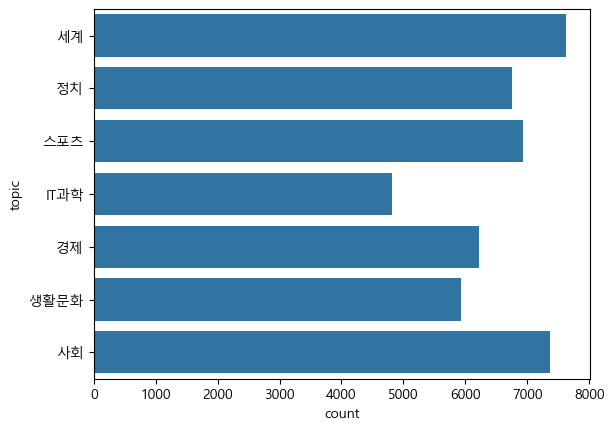

In [19]:
sns.countplot(data = df, y = 'topic')  # y를 group by해서 count

#### 파생 변수 만들기
1. 문자 길이 (안녕하세요 : 5 글자)
2. 문장을 띄어쓰기 기준으로 split한 길이
3. 중복값을 제거한 2번

In [22]:
df['len'] = df['title'].apply(lambda x: len(x))
# len 열에는 title의 길이가 들어간다
df

,index,title,topic_idx,topic,len
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25
...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29


In [23]:
df['wordcount'] = df['title'].apply(lambda x: len(x.split()))
# wordcount 열은 띄어쓰기 기준으로 split 된 길이
df

,index,title,topic_idx,topic,len,wordcount
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7
...,...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28,9
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6


In [25]:
df['unique_wordcount'] = df['title'].apply(lambda x: len(set(x.split())))
df

,index,title,topic_idx,topic,len,wordcount,unique_wordcount
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7
...,...,...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6


<Axes: xlabel='unique_wordcount', ylabel='Count'>

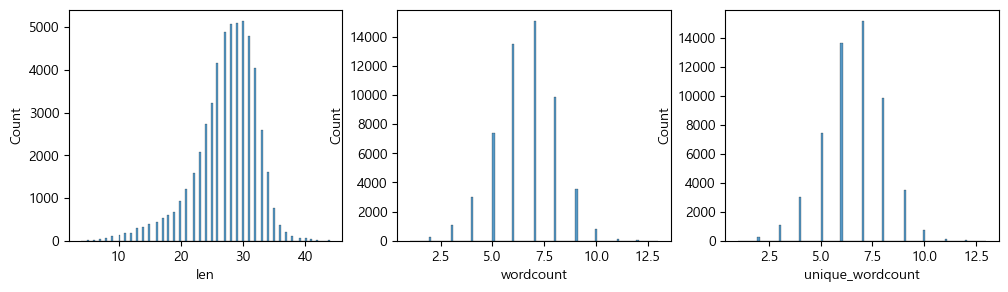

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df['len'], ax=axes[0])
sns.histplot(df['wordcount'], ax=axes[1])
sns.histplot(df['unique_wordcount'], ax=axes[2])

In [29]:
df[['len', 'wordcount', 'unique_wordcount']].describe()

,len,wordcount,unique_wordcount
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


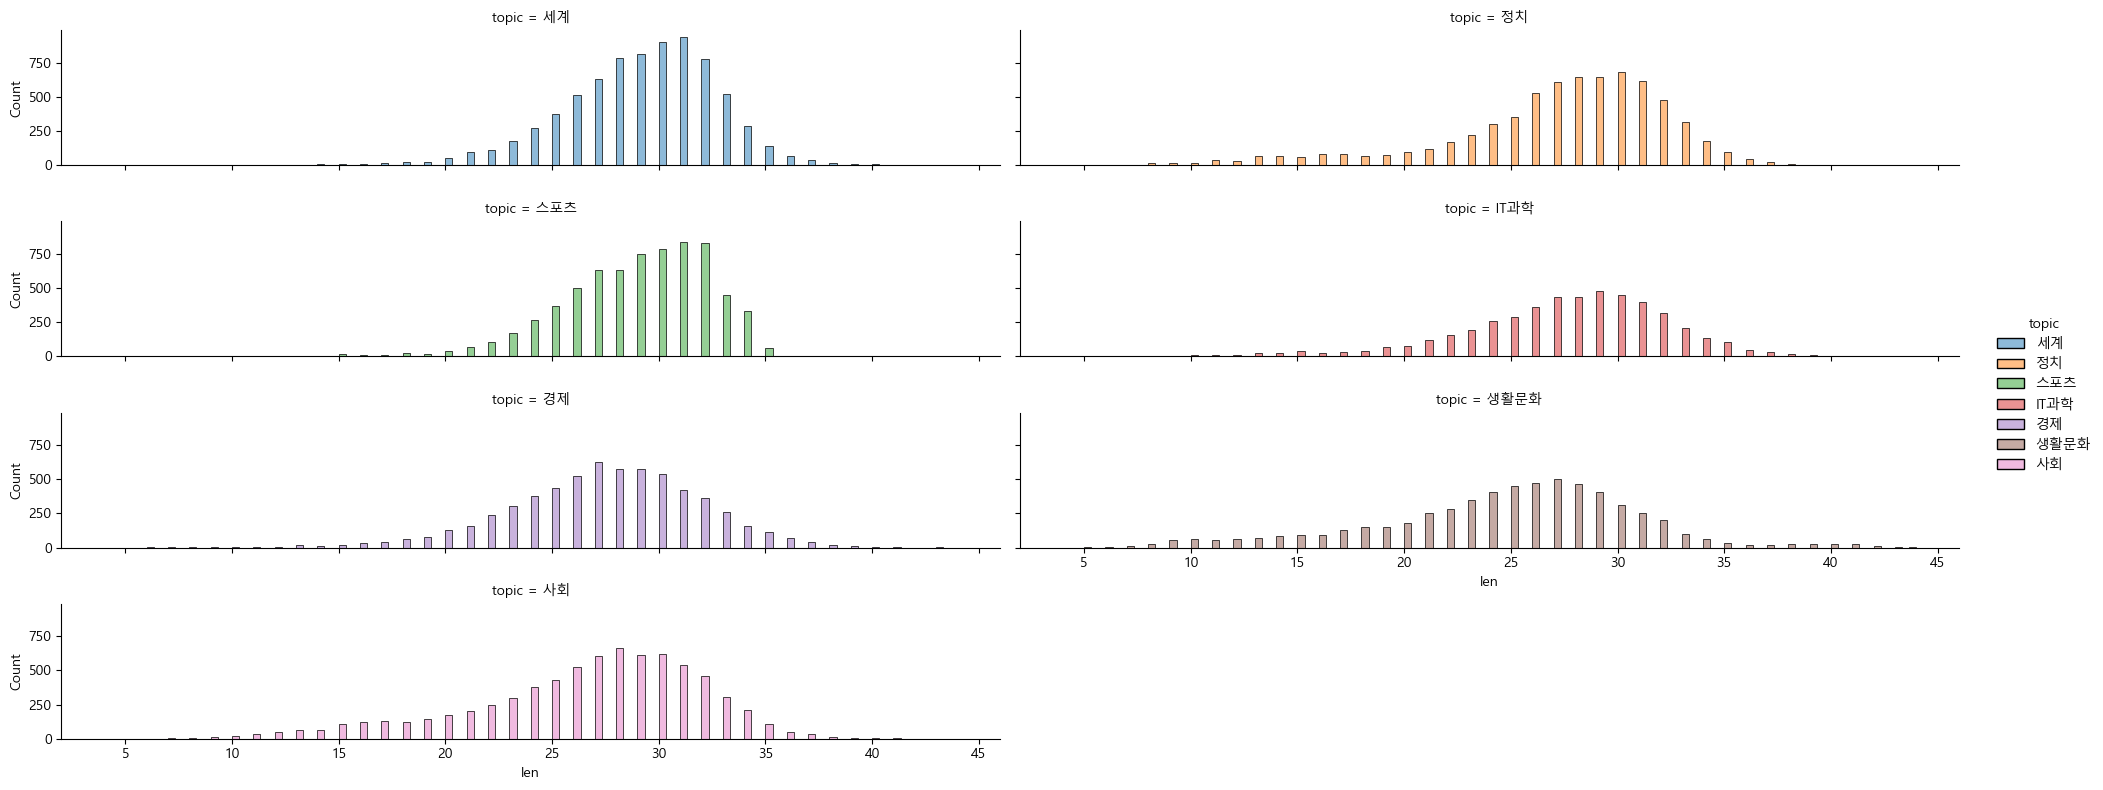

In [30]:
sns.displot(data=df, x='len', hue='topic', col='topic', col_wrap=2, aspect=5, height=2)  # hue: 값에 따라 색깔을 다르게 준다, col_wrap: subplot 세로 개수, aspect: 가로 비율(클수록 가로가 길어짐)

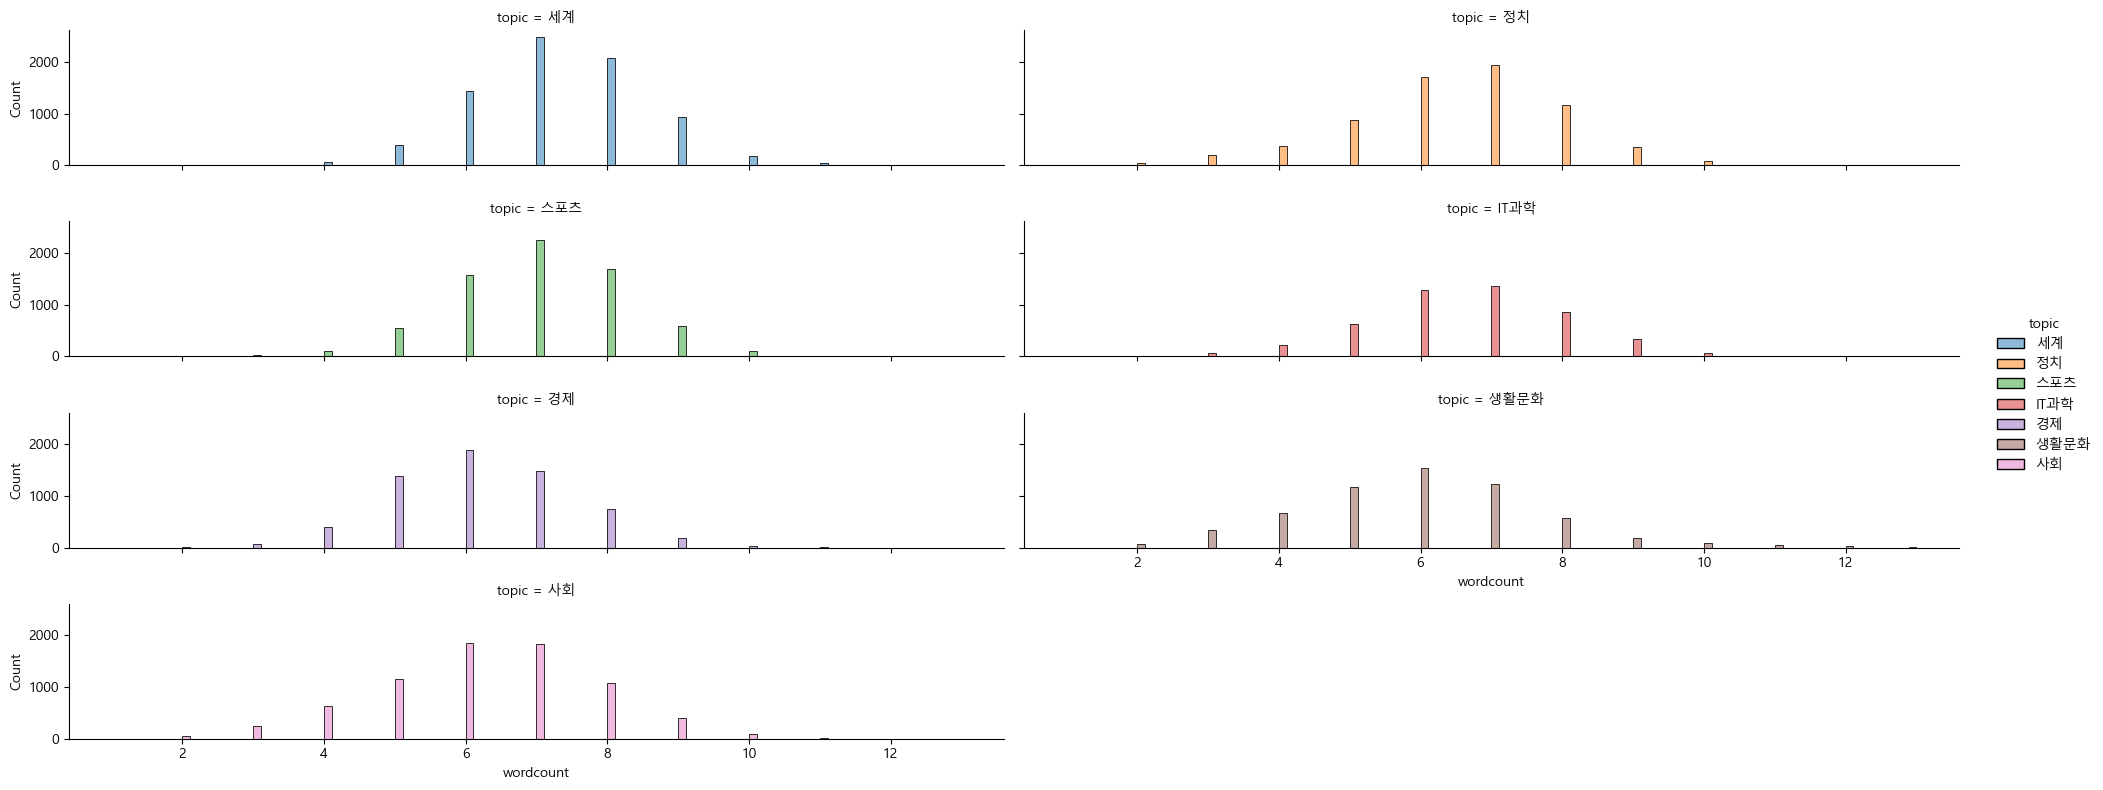

In [31]:
sns.displot(data=df, x='wordcount', hue='topic', col='topic', col_wrap=2, aspect=5, height=2) 

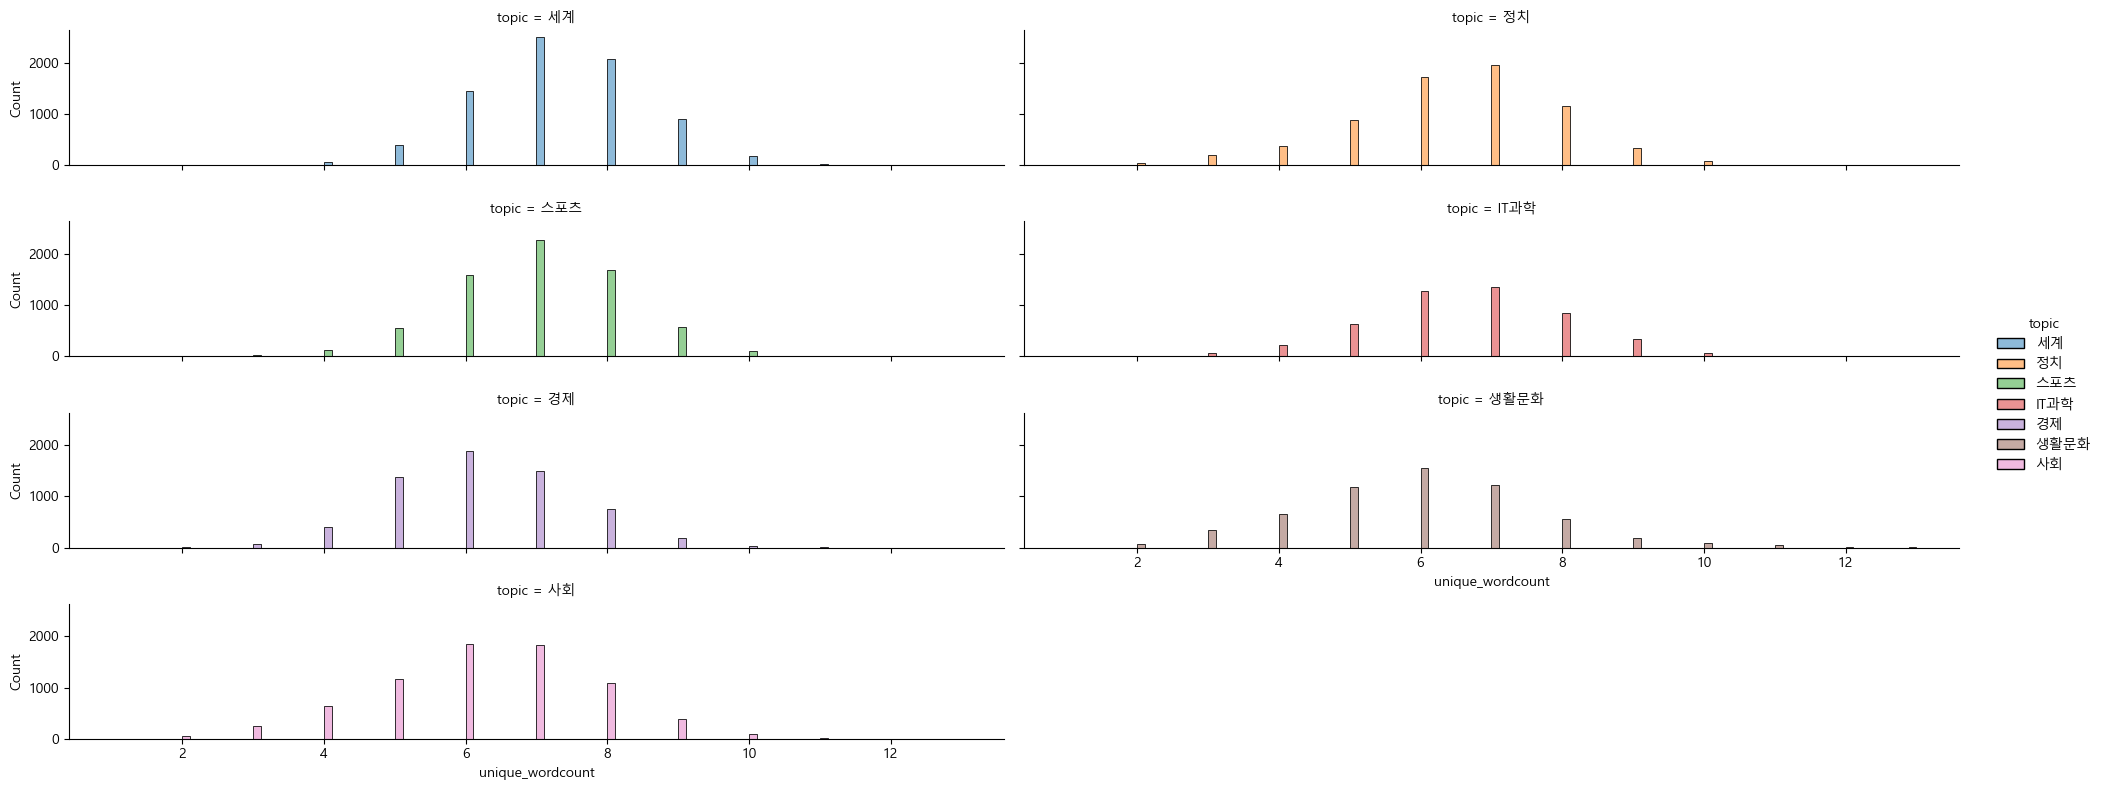

In [32]:
sns.displot(data=df, x='unique_wordcount', hue='topic', col='topic', col_wrap=2, aspect=5, height=2) 

#### 전처리

In [36]:
import re
df['title'] = df['title'].map(lambda x: re.sub('[0-9]', '', x))
df.tail()

,index,title,topic_idx,topic,len,wordcount,unique_wordcount
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN,31,7,7


In [37]:
df['title'] = df['title'].str.lower()
df.tail()

,index,title,topic_idx,topic,len,wordcount,unique_wordcount
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN,31,7,7


In [39]:
def remove_stopword(text):
    tokens = text.split(' ')
    stops = ['하다', '한다', '합니다', '할', '하는', '그리고', '입니다', '그', '등', '이런', '저런', '것', '및', '더']
    meaningful_words = []
    for token in tokens:
        if token not in stops:
            meaningful_words.append(token)

    return ' '.join(meaningful_words)

In [40]:
df['title'] = df['title'].apply(remove_stopword)

In [55]:
df.tail()

,index,title,topic_idx,topic,len,wordcount,unique_wordcount
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN,31,7,7


In [56]:
label_name = 'topic_idx'

In [57]:
train = df[df[label_name].notnull()].copy()
test = df[df[label_name].isnull()].copy()

In [44]:
train.shape, test.shape

((45654, 3), (9131, 2))

In [59]:
from konlpy.tag import Okt
okt = Okt()

In [60]:
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):  # 형태소로 분할한 것에 품사까지 출력이 된다
        if word[1] not in ['Josa', 'Eomi', 'Puntcuation']:
            clean_text.append(word[0])
    return ' '.join(clean_text)

In [61]:
from tqdm import tqdm  # pandas 내장 함수
tqdm.pandas()

In [62]:
train['title'] = train['title'].progress_map(okt_clean)
test['title'] = test['title'].progress_map(okt_clean)  # progress_map? 함수를 실행할 때 진행상황을 표시하는 바를 보여주는 함수

100%|██████████| 9131/9131 [00:08<00:00, 1065.19it/s]


In [63]:
train.head(10)

,index,title,topic_idx,topic,len,wordcount,unique_wordcount
0,0,인천 → 핀란드 항공기 결항 … 휴가 철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서다 … 구글 조원 들이다 美 전역 거점 화,4.0,세계,30,6,6
2,2,이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추다,4.0,세계,30,8,8
3,3,nyt 클린턴 측근 韓 기업 특수 관계 조명 … 공과 사 맞다 물리다 종합,4.0,세계,32,7,7
4,4,시진핑 트럼프 중미 무역 협상 조속 타결 희망,4.0,세계,25,7,7
5,5,팔레스타인 가자지구 세 소년 이스라엘군 총격 사망,4.0,세계,31,7,7
6,6,인도 년 파키스탄 공습 … 테러 캠프 폭격 종합 보,4.0,세계,30,7,7
7,7,美 대선 tv 토론 음담패설 만회 실패 트럼프 … 사과 대신 빌다 클린턴 공격 하다...,4.0,세계,41,9,9
8,8,푸틴 한반도 상황 진전 위 방안 김정은 위원장 논의,4.0,세계,30,9,9
9,9,특검 면죄부 받다 트럼프 스캔들 보도 언론 맹공 … 국민 적,4.0,세계,32,9,9


In [64]:
X_train  = train['title']
X_test = test['title']

In [66]:
y_train = train[label_name]
y_train.value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [67]:
y_test = test[label_name]
y_test.value_counts()

Series([], Name: count, dtype: int64)

In [218]:
X_train.head()

0                인천 → 핀란드 항공기 결항 … 휴가 철 여행객 분통
1             실리콘밸리 넘어서다 … 구글 조원 들이다 美 전역 거점 화
2                이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추다
3    nyt 클린턴 측근 韓 기업 특수 관계 조명 … 공과 사 맞다 물리다 종합
4                    시진핑 트럼프 중미 무역 협상 조속 타결 희망
Name: title, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 자연어 처리 -> 자연어, 처리, 자연어 처리
tfidf_vect = TfidfVectorizer(tokenizer=None, ngram_range=(1, 2), min_df=3, max_df=0.95)  # tokenizer: 토큰화할건지 ngram_range: 단어 한개~두개를 벡터 범위로 지정 min_df: 최소한 세 개 이상의 문서에 등장해야 한다  max_df: 전체 문서의 95퍼센트 이하로 등장해야 한다

In [70]:
tfidf_vect.fit(X_train)  # 학습

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [71]:
X_train.shape, X_test.shape

((45654,), (9131,))

In [72]:
train_feature_tfidf = tfidf_vect.transform(X_train)  # 벡터화
test_feature_tfidf = tfidf_vect.transform(X_test)

In [73]:
train_feature_tfidf.shape, test_feature_tfidf.shape

((45654, 26053), (9131, 26053))

In [77]:
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))

26053


In [79]:
vocab[24000:24060]

array(['플리', '피겨', '피격', '피곤하다', '피날레', '피닉스', '피다', '피란', '피랍', '피로',
       '피부', '피부 개발', '피살', '피소', '피스컵', '피습', '피신', '피싱', '피아노', '피아니스트',
       '피아니스트 조성진', '피어', '피어 밴드', '피오렌티나', '피우다', '피의자', '피자', '피처',
       '피처폰', '피츠버그', '피츠버그 강정호', '피치', '피칭', '피칭 머신', '피터', '피폭', '피플',
       '피하', '피해', '피해 구제', '피해 기업', '피해 대책', '피해 보상', '피해 복구', '피해 속출',
       '피해 신고', '피해 심각', '피해 억원', '피해 없다', '피해 우려', '피해 지역', '피해 최소',
       '피해 크다', '피해 할머니', '피해자', '피홈런', '핀란드', '필기', '필기 시험', '필드'],
      dtype=object)

In [88]:
train_feature_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
dist = np.sum(train_feature_tfidf, axis=0)

In [81]:
dist  # 각 단어 별 tfidf 값

matrix([[1.63870401, 1.44835092, 1.44364459, ..., 1.31628288, 1.81502518,
         2.35683837]])

In [83]:
vocab_count = pd.DataFrame(dist, columns=vocab)
vocab_count

,aa,abs,abu,ac,ac 밀란,acl,acl 차다,afc,afc 챔스리그,afc 챔피언스리그,...,힐러리 지지,힐러리 트럼프,힐링,힘겹다,힘내다,힘드다,힘들다,힘쓰다,힘차다,힙합
0,1.638704,1.448351,1.443645,1.178914,1.178914,4.714391,1.368398,10.477363,3.615439,1.249048,...,1.159541,9.293351,5.925178,1.924272,3.960518,5.230625,10.003089,1.316283,1.815025,2.356838


<Axes: >

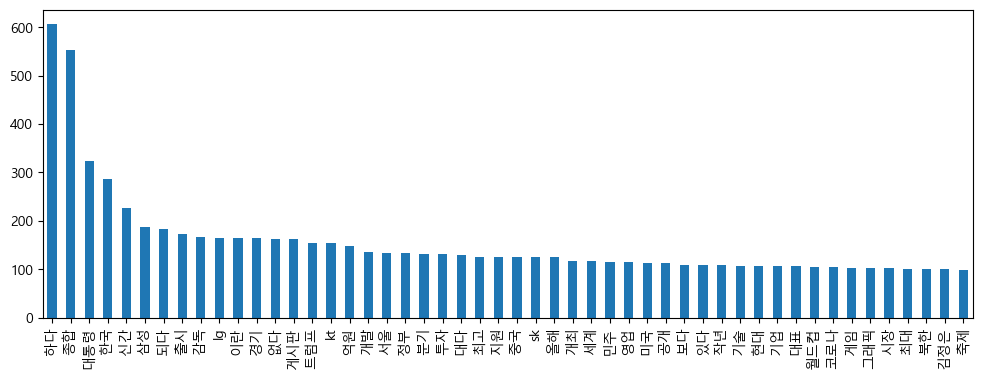

In [91]:
vocab_count.T[0].sort_values(ascending=False).head(50).plot.bar(figsize=(12, 4))

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [96]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, train_feature_tfidf, y_train, cv=3, verbose=1)  # verbose: 진행상황 출력, 병렬처리 해주는 옵션을 같이 넣어줘야 한다

In [97]:
y_pred == y_train

0        False
1        False
2         True
3        False
4         True
         ...  
45649     True
45650     True
45651     True
45652     True
45653     True
Name: topic_idx, Length: 45654, dtype: bool

In [98]:
valid_accuracy = (y_pred == y_train).mean()
valid_accuracy

0.7706225084329961

In [ ]:
# k-fold, cross_val : 검증... not 모델 예측

In [99]:
df_accuracy = pd.DataFrame({'predict': y_pred, 'train': y_train})

In [101]:
df_accuracy['accuracy'] = (y_pred == y_train)
df_accuracy

,predict,train,accuracy
0,2.0,4.0,False
1,1.0,4.0,False
2,4.0,4.0,True
3,6.0,4.0,False
4,4.0,4.0,True
...,...,...,...
45649,1.0,1.0,True
45650,2.0,2.0,True
45651,1.0,1.0,True
45652,2.0,2.0,True


In [103]:
df_accuracy.groupby(['predict'])['accuracy'].mean()

predict
0.0    0.663781
1.0    0.794926
2.0    0.636527
3.0    0.752356
4.0    0.847333
5.0    0.924963
6.0    0.775456
Name: accuracy, dtype: float64

In [104]:
%time model.fit(train_feature_tfidf, y_train)

CPU times: total: 2min 21s
Wall time: 2min 24s


RandomForestClassifier(random_state=42)

In [107]:
y_predict = model.predict(test_feature_tfidf)
y_predict[:5]

array([2., 3., 0., 2., 3.])

In [115]:
submit = pd.read_csv('./data/open/sample_submission.csv')
submit

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0
...,...,...
9126,54780,0
9127,54781,0
9128,54782,0
9129,54783,0



## 🌼마무리 문제

Q. 국민청원 데이터로 응답 여부 0과 1로 이진분류하기
- 전체 데이터 중 투표(votes)가 500건 이상인 데이터만 사용하되 20만건 이상인 데이터셋을 제외하고 사용합니다
- 투표수가 전체 평균보다 크면 1, 적으면 0으로 분류될 수 있도록 전처리하고 모델을 통해 예측합니다

In [121]:
petitions = pd.read_csv('./data/petition.csv')
petitions.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [122]:
petitions.shape

(395547, 8)

In [129]:
realp = petitions[(petitions['votes'] >= 500) & (petitions['votes'] < 200000)]
realp.shape

(5319, 8)

In [130]:
avg_votes = realp['votes'].mean()
avg_votes

5653.366798270352

In [132]:
realdf = realp.copy()

realdf['value'] = realdf['votes'].apply(lambda x: 1 if x >= avg_votes else 0)
realdf

,article_id,start,end,answered,votes,category,title,content,value
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",1
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0
...,...,...,...,...,...,...,...,...,...
394876,516130,2019-02-03,2019-03-05,0,1499,문화/예술/체육/언론,대한민국 순국선열유족회 기관지 월간 <순국>지가 폐간되지 않게 해주세요.,지령 336호 월간 <순국>이 폐간 위기에 놓였습니다.\n<순국>지는 사단법인 '대...,0
395247,516667,2019-02-04,2019-03-06,0,3353,경제민주화,악덕기업 화승 4달치 판매대금 불법으로 어음주고 수백명 매니져들한테 떠넘기고 회...,k스위스 르까프 머렐 화승 3개 브렌드 매니져들한테 판매대금 어...,0
395352,516820,2019-02-04,2019-03-06,0,4930,인권/성평등,섬에서 갇혀살아가는 성매매여성들을 도와주세요.,섬에 다방이나 성매매 업자들에게 과한 빚이나 폭력으로 묶여 삶을 유린당하는 여성들이...,0
395407,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...,0


<Axes: xlabel='count', ylabel='value'>

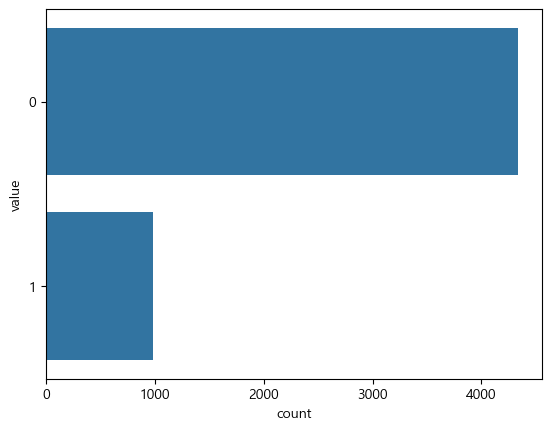

In [135]:
sns.countplot(data=realdf, y=realdf['value'])

In [306]:
X = realdf[['content']]
y = realdf['value']

In [377]:
realdf['value'].dtypes

dtype('int64')

In [307]:
X.head()

,content
7,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
13,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
21,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...


In [308]:
Xc = X.copy()

In [309]:
Xc['content'] = Xc['content'].map(lambda x: re.sub(r'\\n', ' ', x))
Xc

,content
7,** 존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주...
13,(현황) 우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은...
21,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...
...,...
394876,지령 336호 월간 <순국>이 폐간 위기에 놓였습니다. <순국>지는 사단법인 '대한...
395247,k스위스 르까프 머렐 화승 3개 브렌드 매니져들한테 판매대금 어...
395352,섬에 다방이나 성매매 업자들에게 과한 빚이나 폭력으로 묶여 삶을 유린당하는 여성들이...
395407,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...


In [310]:
Xc['content'] = Xc['content'].map(lambda x: re.sub('[^a-zA-Z가-힣0-9\s]', ' ', x))
Xc.head()

,content
7,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주...
13,현황 우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은...
21,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...
24,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...
28,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 3학년 학생...


In [311]:
Xc['content'] = Xc['content'].str.lower()
Xc.head()

,content
7,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 kospi상장사의 소액 주...
13,현황 우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은...
21,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...
24,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...
28,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 3학년 학생...


In [333]:
with open('./data/stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().split()

In [378]:
def remove_sw(text):
    tokens = text.split(' ')
    stops = stopwords
    meaning = []
    for token in tokens:
        if token not in stops and len(token) > 1:
            meaning.append(token)
    
    return ' '.join(meaning)

In [379]:
Xc['content'] = Xc['content'].apply(remove_sw)

In [380]:
Xc.tail()

,content
394876,지령 336 월간 순국 폐간 위기 놓이다 순국 지다 사단법인 대한민국 순국선열 유족...
395247,스위스 르까프 머렐 화승 브렌 매다 들다 판매 대금 어음 받다 매다 은행가 계약 어...
395352,다방 성매매 업자 폭력 묶이다 유린 당하다 여성 많다 들다 가출 청소년 숙식 해결 ...
395407,올해 운동 임시정부 수립 100 주년 맞다 시민 촛불 혁명 통해 민주 정부 수립 한...
395488,일부 공무원 시험 경찰 대학교 사관학교 협약 맺다 여타 고등학교 대학교 여성 합격자...


In [381]:
def okt_cln(text):
    clean = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Puntcuation']:
            clean.append(word[0])
    
    return ' '.join(clean)

In [382]:
Xc['content'] = Xc['content'].progress_map(okt_cln)

100%|██████████| 5319/5319 [02:00<00:00, 44.30it/s] 


In [383]:
Xc[2500:2600]

,content
189988,국회의원 비리 부정부패 정경 유착 합당 행동 국민 국회의원 소환 심판 국회의원 공직...
190005,18 광주 민주화 운동 폭동 사회 크다 충격 김길태 사건 모방 퍼포먼스 매우 사회 ...
190024,여자 초등학생 중학생 50 60 생리 조절 근데 여성 위생용품 생리대 가격 비싸다 ...
190070,중학생 상대로 욕설 막말 일삼 늘다 짓다 어른 추하다 부끄럽다 노릇 국회의원 나경원...
190136,5월 14일 2019년 최저임금 논의 최저임금 위원회 시동 걸다 인상 제도 개선 최...
...,...
194532,간혹 청와대 홈페이지 국민 진실되다 목소리 장난 내용 올라오다 지금 청와대 홈페이지...
194534,대진 침대 음이온 라텍스 라돈 준치 초과 안위 검사 결과 밝혀지다 특히 음이온 라텍...
194548,안녕하다 올해 10년 보육 교사 청원 드리다 싶다 가지 안건 첫째 평가 인증 폐지 ...
194669,최근 날씨 더워지다 오다 여름 최강 폭염 찾아오다 기상청 예측 나오다 여름 날씨 대...


In [384]:
Xct = Xc['content']

In [415]:
tfidf_v = TfidfVectorizer(tokenizer=None, ngram_range=(1, 2), min_df=5, max_features=2000)

In [416]:
tfidf_v.fit(Xct)

TfidfVectorizer(max_features=2000, min_df=5, ngram_range=(1, 2))

In [417]:
Xctt = tfidf_v.transform(Xct)

In [418]:
Xctt.shape

(5319, 2000)

In [419]:
v = tfidf_v.get_feature_names_out()

In [421]:
v[100:200]

array(['news naver', 'nhn', 'nhn mode', 'oecd', 'of', 'oid', 'php',
       'read', 'read nhn', 'sbs', 'sec', 'sid', 'sns', 'the', 'tv',
       'view', 'www', '가게', '가격', '가구', '가까이', '가깝다', '가능성', '가능하다', '가다',
       '가량', '가르치다', '가면', '가산', '가상', '가상 화폐', '가슴', '가야', '가요', '가운데',
       '가입', '가장', '가장 크다', '가정', '가정폭력', '가족', '가중', '가지', '가치', '가하다',
       '가해', '가해 학생', '가해자', '간곡히', '간곡히 부탁드리다', '간부', '간의', '간절하다', '간호',
       '간호사', '갈다', '갈등', '감당', '감독', '감사', '감사하다', '감소', '감시', '감염',
       '감정', '갑자기', '강간', '강남', '강력하다', '강력하다 처벌', '강사', '강아지', '강요',
       '강제', '강조', '강하다', '강화', '강화하다', '갖다', '갖추다', '개발', '개선', '개월',
       '개인', '개인 투자자', '개입', '개정', '개정안', '개혁', '거기', '거나', '거래', '거래소',
       '거리', '거부', '거절', '거주', '거짓', '거짓말', '거치'], dtype=object)

In [422]:
Xctt.toarray()

array([[0.        , 0.07171347, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04937785, 0.29782775, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03404604,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [423]:
hap = np.sum(Xctt, axis=0)
hap

matrix([[ 6.92597526,  9.54436404,  6.13522657, ..., 25.83446436,
         34.68608093,  8.33456445]])

In [424]:
vc = pd.DataFrame(hap, columns=v)

In [425]:
vc

,00,000,000원,10,100,10년,10월,11,119,11월,...,훼손,휴가,휴게,흐르다,흘리다,희망,희생,힘드다,힘들다,힘없다
0,6.925975,9.544364,6.135227,27.182132,16.692393,19.523733,16.238264,11.916609,7.571078,13.141834,...,11.346337,10.046055,10.981415,7.465834,11.745784,19.362985,16.109942,25.834464,34.686081,8.334564


<Axes: >

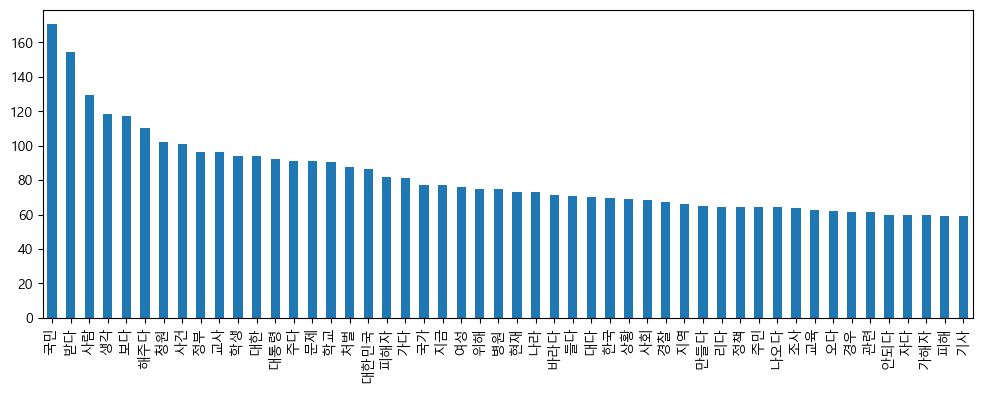

In [426]:
vc.T[0].sort_values(ascending=False).head(50).plot.bar(figsize=(12, 4))

In [427]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [428]:
ypred = cross_val_predict(rf, Xctt, y, cv=3)

In [429]:
ypred == y

7          True
13         True
21        False
24         True
28         True
          ...  
394876     True
395247     True
395352     True
395407     True
395488     True
Name: value, Length: 5319, dtype: bool

In [430]:
vaccuracy = (ypred == y).mean()
vaccuracy

0.8150028200789622

In [431]:
dfacc = pd.DataFrame({'predict': ypred, 'real': y})
dfacc

,predict,real
7,0,0
13,0,0
21,0,1
24,0,0
28,0,0
...,...,...
394876,0,0
395247,0,0
395352,0,0
395407,0,0


In [432]:
dfacc['accuracy'] = (ypred==y)
dfacc

,predict,real,accuracy
7,0,0,True
13,0,0,True
21,0,1,False
24,0,0,True
28,0,0,True
...,...,...,...
394876,0,0,True
395247,0,0,True
395352,0,0,True
395407,0,0,True


In [433]:
dfacc.groupby('predict')['accuracy'].mean()

predict
0    0.816569
1    0.400000
Name: accuracy, dtype: float64

In [434]:
Xctt.shape

(5319, 2000)

In [435]:
trainp = Xctt[:4000]
testp = Xctt[4000:]
trainy = y[:4000]
testy = y[4000:]

In [436]:
%time rf.fit(trainp, trainy)

CPU times: total: 7.7 s
Wall time: 7.95 s


RandomForestClassifier(random_state=42)

In [437]:
predy = rf.predict(testp)

In [438]:
compare = pd.DataFrame({
    'predict': predy,
    'real': testy
})

compare

,predict,real
301345,0,1
301376,0,1
301414,0,1
301435,0,0
301615,0,0
...,...,...
394876,0,0
395247,0,0
395352,0,0
395407,0,0


In [439]:
compare['accuracy'] = compare['predict'] == compare['real']
compare

,predict,real,accuracy
301345,0,1,False
301376,0,1,False
301414,0,1,False
301435,0,0,True
301615,0,0,True
...,...,...,...
394876,0,0,True
395247,0,0,True
395352,0,0,True
395407,0,0,True


In [440]:
compare.groupby('predict')['accuracy'].mean()

predict
0    0.816311
1    0.428571
Name: accuracy, dtype: float64

In [441]:
compare[(compare['real'] == 1) & (compare['accuracy'] == True)]

,predict,real,accuracy
312982,1,1,True
335522,1,1,True
364348,1,1,True


In [442]:
compare[compare['predict'] == 1]

,predict,real,accuracy
305634,1,0,False
312181,1,0,False
312982,1,1,True
335522,1,1,True
364348,1,1,True
373468,1,0,False
380142,1,0,False
